# Initial notebook for processing SaaS data
    
    mainly familiarizing with the data properties and discovering features

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline 
import matplotlib.pyplot as plt



# Load SaaS Console data

In [3]:
from config import *
#Paths defined in Config file python

#Saas Paths
#raw_saas_path  
#proc_saas_path  

#RabbitMQ paths
#raw_evts_path  
#proc_evts_path  

#function for loading data
def load_data(csv_path):
    return pd.read_csv(csv_path,\
                    parse_dates=['timestamp'] ,index_col=['timestamp'])#comment if timestamp indexing not wanted
                      

sas_data = load_data(raw_saas_v2)


sas_data.head()

C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,_id,event_type,user_id,user_type,clients_codes.0,clients_codes.1,clients_codes.2,clients_codes.3,clients_codes.4,clients_codes.5,...,profiles.9.application_code,profiles.10.role_code,profiles.10.application_code,profiles.11.role_code,profiles.11.application_code,profiles.12.role_code,profiles.12.application_code,profiles.13.role_code,profiles.13.application_code,_class
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-05-17 07:05:34.725000+00:00,5e7b882dd21b7c58687083a4,USER_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:05:42.191000+00:00,5e7b882dd21b7c58687083a5,PROFILE_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:06:29.054000+00:00,5e7b882dd21b7c58687083a6,USER_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:06:36.717000+00:00,5e7b882dd21b7c58687083a7,PROFILE_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:06:47.609000+00:00,5e7b882dd21b7c58687083a8,USER_UPDATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...


In [4]:
sas_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187683 entries, 2019-05-17 07:05:34.725000+00:00 to 2020-06-26 12:36:20.058000+00:00
Data columns (total 53 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   _id                           187683 non-null  object 
 1   event_type                    187683 non-null  object 
 2   user_id                       187683 non-null  int64  
 3   user_type                     187683 non-null  object 
 4   clients_codes.0               187683 non-null  object 
 5   clients_codes.1               30104 non-null   object 
 6   clients_codes.2               22859 non-null   object 
 7   clients_codes.3               19558 non-null   object 
 8   clients_codes.4               18484 non-null   object 
 9   clients_codes.5               13625 non-null   object 
 10  clients_codes.6               12150 non-null   object 
 11  clients_codes.7               11913 non-null

In [5]:
sas_data[sas_data.index.day == 12].tail()
sas_data[sas_data.index.month == 12].tail()

,_id,event_type,user_id,user_type,clients_codes.0,clients_codes.1,clients_codes.2,clients_codes.3,clients_codes.4,clients_codes.5,...,profiles.9.application_code,profiles.10.role_code,profiles.10.application_code,profiles.11.role_code,profiles.11.application_code,profiles.12.role_code,profiles.12.application_code,profiles.13.role_code,profiles.13.application_code,_class
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-12-31 22:02:59.401000+00:00,5e7b8889d21b7c5868715a28,PROFILE_UPDATED,442906,STANDARD,379612,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-31 22:02:59.420000+00:00,5e7b8889d21b7c5868715a29,PROFILE_UPDATED,443156,STANDARD,205,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-31 22:02:59.434000+00:00,5e7b8889d21b7c5868715a2a,PROFILE_UPDATED,260551,STANDARD,BL,56776,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-31 22:02:59.448000+00:00,5e7b8889d21b7c5868715a2b,PROFILE_UPDATED,445907,STANDARD,3925,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-31 22:02:59.465000+00:00,5e7b8889d21b7c5868715a2c,PROFILE_UPDATED,451959,STANDARD,343821,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...


In [6]:
"""
df = sas_data.copy() usually is handy when the df takes a while to load from disk. 
This way when you mess up, you can just simply run this to 'reset' the data DataFrame.
"""
df = sas_data.copy()

# Check min value of index 

print(df.index.min())

# Check max value of index 
print(df.index.max())


2019-05-17 07:05:34.725000+00:00
2020-06-26 12:36:20.058000+00:00


# Dealing with Non numerical client codes


In [7]:
client_str_0= df.loc[(df['clients_codes.0'] >= 'A') & (df['clients_codes.0'] <= 'z')]
client_str_0 = client_str_0['clients_codes.0'] 
client_str_0.value_counts()

CLIENT_INCONNU                  171
BL                              165
BLEVILLE                        110
CDC_LaMedullienne                35
VILLEENFANCESOLENE               31
Clairvillage                     30
BLAT_DEMO                        28
ADICO                            27
DSC_ENF_BL_31202                 20
BLTECH-INTRINSEC                 15
LIBRE_AIR_20329                  13
AREDTEST3                        11
BLenfanceBergerLevraultVille     10
JMELPORTCIT                       7
DEMO                              6
DEMOSTRACION                      6
FORMATION-RH                      6
agendaveyron                      5
THOUARCE                          4
SOYAUX                            4
eEnfanceBergerLevraultVille       4
BLcanada                          3
BLenfanceSicoval                  3
NLEB                              2
DEMOFACFAM                        1
SUPPORT_CONSOLE                   1
Name: clients_codes.0, dtype: int64

In [8]:
client_str_1 = df.loc[(df['clients_codes.1'] >= 'A') & (df['clients_codes.1'] <= 'z')]
client_str_1 = client_str_1['clients_codes.1'] 
client_str_1.value_counts()

THOUARCE                        254
BLEVILLE                        201
CLIENT_INCONNU                   57
BL                               43
TEST2101                         23
CDC_LaMedullienne                15
VILLEENFANCESOLENE               14
DSC_ENF_BL_31202                 11
BLenfanceBergerLevraultVille     10
SOYAUX                            9
NLEB                              6
BLAT_DEMO                         4
JMELPORTCIT                       3
eEnfanceBergerLevraultVille       3
DEMO                              2
Clairvillage                      2
ROYAUME                           2
DEMOSTRACION                      2
Name: clients_codes.1, dtype: int64

# Dealing with profiles role_code

In [10]:
df['profiles.0.role_code'].value_counts()

ROLE_USER              169742
ROLE_UTILISATEUR         4569
ROLE_ADMIN               3366
ROLE_SUPER_ADMIN          287
ROLE_ADMINISTRATEUR        77
ROLE_WRITER                19
ROLE_SUPER_WSCLIENT        12
ROLE_USER_DEMO              8
ROLE_BOOTSTRAP              3
ROLE_APPLICATION            3
ROLE_API                    2
Name: profiles.0.role_code, dtype: int64

In [11]:
df['profiles.0.application_code'].value_counts()

CONSOLE_SAAS                 31809
LEGIBASE_ETAT_CIVIL          16287
PFA                          13317
BL_SOINS                     13104
BL_REFERENTIEL                9567
BL_RESIDENT                   8689
BL_RH_MOBILE                  6566
ECOMPTA                       5004
ABOREVNUM                     4599
E_PAIE                        4268
LEGB_FRAIS_DEPEN              3877
LEGB_AIDE_JURID               3729
LEGIBASE_MP                   3517
LEGB_TI_SERV_CIV              3457
LEGB_TI_SERV_GEN              3438
BL_PLANNING                   3413
LEGB_TUTELLE                  3413
LEGB_TRIB_POLICE              3346
LEGB_TGI_SERV_CIV             3229
LEGB_INSTRUCTION              3166
LEGB_TGI_SERV_GEN             3164
LEGB_AUD_CORREC               3152
LEGB_COUR_ASSISE              2897
LEGIREDAC                     2762
LEGIMARCHES                   2625
LEGIPROC                      2401
LEGB_TRIB_ENF                 2133
LEGB_PROC_PRUD                1936
LEGB_VOIE_EXEC      

# Dealing with Missing data

In [12]:
df.isnull().sum()

_id                                  0
event_type                           0
user_id                              0
user_type                            0
clients_codes.0                      0
clients_codes.1                 157579
clients_codes.2                 164824
clients_codes.3                 168125
clients_codes.4                 169199
clients_codes.5                 174058
clients_codes.6                 175533
clients_codes.7                 175770
clients_codes.8                 175968
clients_codes.9                 175995
clients_codes.10                176413
clients_codes.11                176423
clients_codes.12                176632
clients_codes.13                176636
clients_codes.14                177528
clients_codes.15                177976
clients_codes.16                177982
clients_codes.17                183867
clients_codes.18                183875
clients_codes.19                183901
profiles.0.role_code              9595
profiles.0.application_co

There are lots of different ways to deal with the NaNs, we will choose the easy way out and drop them all.  
The main reason for this is that there is no scientific reason to do anything else, e.g. interpolate the missing data.  
Note that dropping the NaNs makes it so there are gaps in the periodicity of the timestamp.  
For example when there are hours missing, they don't appear as NaN but they simply are not in the DataFrame at all.

In [14]:
# Drop the NaNs
#df = df.dropna()

# Creating categorical data for the datetime information
 
 

In [15]:
# Get all the data out of datetime
# Could also get holiday data: https://stackoverflow.com/questions/29688899/pandas-checking-if-a-date-is-a-holiday-and-assigning-boolean-value

df['hour'] = df.index.hour #create column containing the hour
df['season'] = (df.index.month%12 + 3)//3 # Calculates the season (categorical)

#df['month'] = df.index.month
#df['week'] = df.index.week
#df['day'] = df.index.day
#df['year'] = df.index.year

#df['month_end'] = df.index.is_month_end
#df['month_start'] = df.index.is_month_start
#df['quarter_end'] = df.index.is_quarter_end
#df['quarter_start'] = df.index.is_quarter_start
dates = pd.DatetimeIndex(df.index.values)

df['year']=dates.year
df['month']=dates.month
df['day_per_month']=dates.day
df['Weekday Name'] = dates.weekday_name
df["dow"] = df.index.weekday #monday 0 ,sunday 6

df


,_id,event_type,user_id,user_type,clients_codes.0,clients_codes.1,clients_codes.2,clients_codes.3,clients_codes.4,profiles.0.role_code,...,profiles.5.role_code,profiles.5.application_code,_class,hour,season,year,month,day_per_month,Weekday Name,dow
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-05-17 07:05:34.725000+00:00,5e7b882dd21b7c58687083a4,USER_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,7,2,2019,5,17,Friday,4
2019-05-17 07:05:42.191000+00:00,5e7b882dd21b7c58687083a5,PROFILE_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,7,2,2019,5,17,Friday,4
2019-05-17 07:06:29.054000+00:00,5e7b882dd21b7c58687083a6,USER_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,7,2,2019,5,17,Friday,4
2019-05-17 07:06:36.717000+00:00,5e7b882dd21b7c58687083a7,PROFILE_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,7,2,2019,5,17,Friday,4
2019-05-17 07:06:47.609000+00:00,5e7b882dd21b7c58687083a8,USER_UPDATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,7,2,2019,5,17,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25 14:28:45.488000+00:00,5e7b88e1d21b7c5868723aea,PROFILE_DELETED,442949,STANDARD,247226,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,14,2,2020,3,25,Wednesday,2
2020-03-25 15:00:19.797000+00:00,5e7b88e1d21b7c5868723aeb,USER_CREATED,458731,STANDARD,266385,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,15,2,2020,3,25,Wednesday,2
2020-03-25 15:00:39.514000+00:00,5e7b88e1d21b7c5868723aec,USER_UPDATED,435623,STANDARD,20810,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,15,2,2020,3,25,Wednesday,2


In [16]:
df['2019'].tail()

,_id,event_type,user_id,user_type,clients_codes.0,clients_codes.1,clients_codes.2,clients_codes.3,clients_codes.4,profiles.0.role_code,...,profiles.5.role_code,profiles.5.application_code,_class,hour,season,year,month,day_per_month,Weekday Name,dow
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-12-31 22:02:59.401000+00:00,5e7b8889d21b7c5868715a28,PROFILE_UPDATED,442906,STANDARD,379612,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,22,1,2019,12,31,Tuesday,1
2019-12-31 22:02:59.420000+00:00,5e7b8889d21b7c5868715a29,PROFILE_UPDATED,443156,STANDARD,205,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,22,1,2019,12,31,Tuesday,1
2019-12-31 22:02:59.434000+00:00,5e7b8889d21b7c5868715a2a,PROFILE_UPDATED,260551,STANDARD,BL,56776,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,22,1,2019,12,31,Tuesday,1
2019-12-31 22:02:59.448000+00:00,5e7b8889d21b7c5868715a2b,PROFILE_UPDATED,445907,STANDARD,3925,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,22,1,2019,12,31,Tuesday,1
2019-12-31 22:02:59.465000+00:00,5e7b8889d21b7c5868715a2c,PROFILE_UPDATED,451959,STANDARD,343821,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,22,1,2019,12,31,Tuesday,1


In [17]:
df['2020'].tail()

,_id,event_type,user_id,user_type,clients_codes.0,clients_codes.1,clients_codes.2,clients_codes.3,clients_codes.4,profiles.0.role_code,...,profiles.5.role_code,profiles.5.application_code,_class,hour,season,year,month,day_per_month,Weekday Name,dow
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-03-25 14:28:45.488000+00:00,5e7b88e1d21b7c5868723aea,PROFILE_DELETED,442949,STANDARD,247226,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,14,2,2020,3,25,Wednesday,2
2020-03-25 15:00:19.797000+00:00,5e7b88e1d21b7c5868723aeb,USER_CREATED,458731,STANDARD,266385,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,15,2,2020,3,25,Wednesday,2
2020-03-25 15:00:39.514000+00:00,5e7b88e1d21b7c5868723aec,USER_UPDATED,435623,STANDARD,20810,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,15,2,2020,3,25,Wednesday,2
2020-03-25 15:00:39.608000+00:00,5e7b88e1d21b7c5868723aed,PROFILE_UPDATED,435623,STANDARD,20810,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,15,2,2020,3,25,Wednesday,2
2020-03-25 15:02:23.561000+00:00,5e7b88e1d21b7c5868723aee,PROFILE_CREATED,458731,STANDARD,266385,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,15,2,2020,3,25,Wednesday,2


In [13]:
df['event_type'].value_counts()

PROFILE_UPDATED    131724
PROFILE_CREATED     21913
USER_UPDATED        20357
USER_CREATED         8472
PROFILE_DELETED      4061
USER_DELETED         1156
Name: event_type, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['evt_code'] = LE.fit_transform(df['event_type'])

LE.classes_

array(['PROFILE_CREATED', 'PROFILE_DELETED', 'PROFILE_UPDATED',
       'USER_CREATED', 'USER_DELETED', 'USER_UPDATED'], dtype=object)

In [20]:
df["user_type"].value_counts()
#sas_data["user_type"].value_counts()

STANDARD     111297
TECHNICAL      1162
Name: user_type, dtype: int64

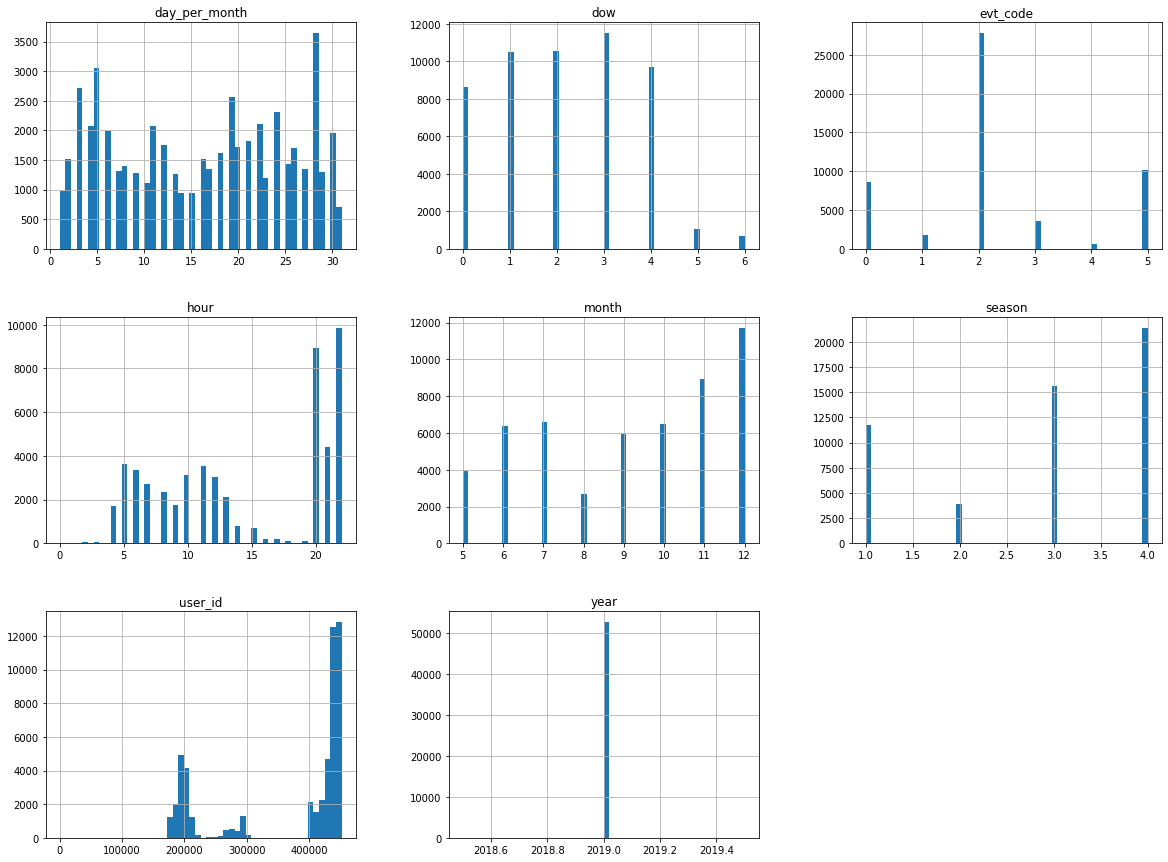

In [21]:

rec_2019 = df.loc['2019-01-01':'2019-12-30']

rec_2019.hist(bins=50, figsize=(20,15))
plt.show()



    notes for 2019 records : 

    Season:peaks towards the end of the year (fourth season which consists of decembre-novembre-octobre)

    hour :most events occured during the after work hours ,starting from 20h and the biggest peak at 22h

    dow: most activity is accomplished within thursday followed by tuesday and wednesday.
    we notice there is very few activity within the weekends (recall that monday 0,tuesday 1 ,wed 2,thurs 3 and so on)

    day_per_month: at the start and towards the end of the month the activity levels peak

    month:12-11-07 most active months  

    events type: the  most frequent type of event is 'PROFILE_UPDATED',
        followed by 'USER_UPDATED' , few events of 'PROFILE_CREATED' 
        Then less events towards 'USER_CREATED' ,'PROFILE_CREATED',
        and lastly minimal events of 'USER_DELETED',  
 

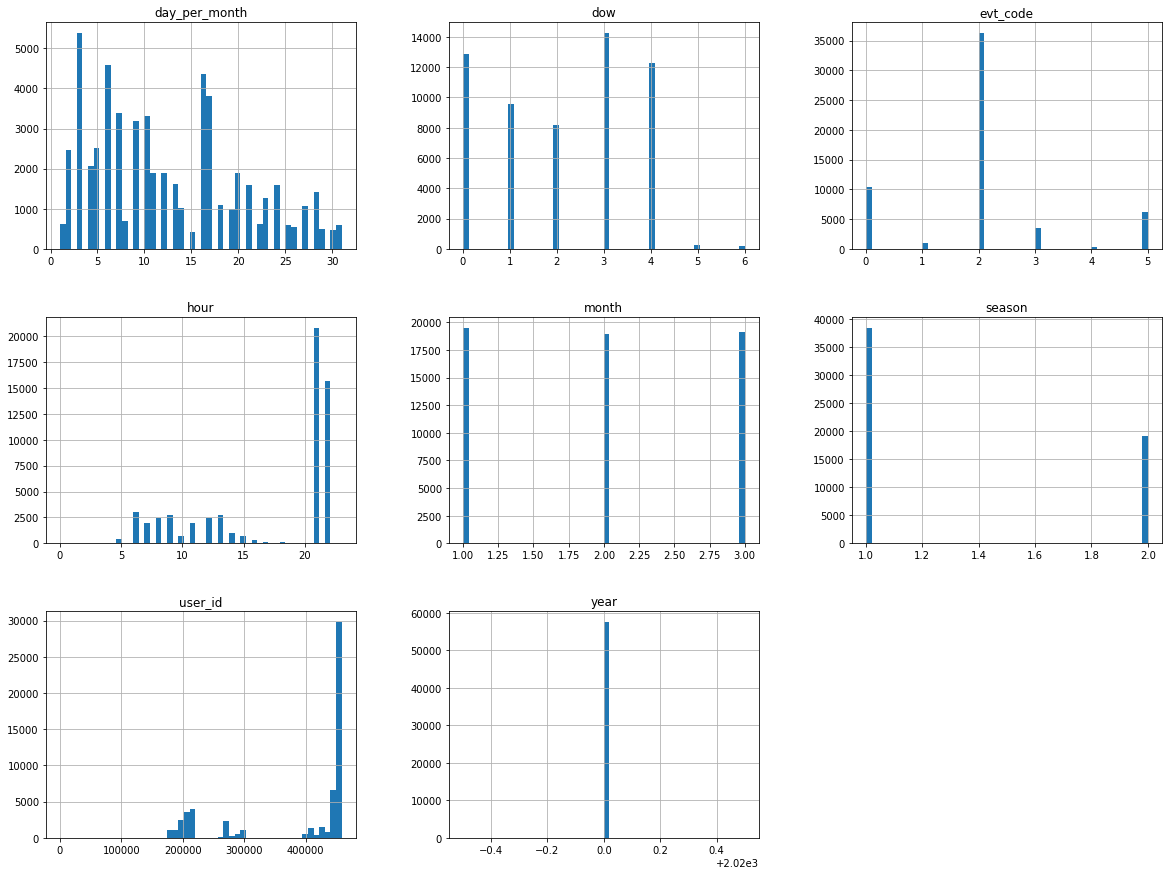

In [22]:
rec_2020 = df.loc['2020-01-01':'2020-03-30']

rec_2020.hist(bins=50, figsize=(20,15))
plt.show()


    notes for 2020 records (3 months of data from 01-01-2020 till 2020-03-25): 

    hour :most events occured during the after work hours ,starting from 21h , biggest peak at 21h followed by 22h

    dow: most activity is accomplished within thursday followed by monday and friday.
    we notice there is very few activity within the weekends,almost no activity (recall that monday 0
    tuesday 1 ,wed 2,thurs 3 and so on)

    day_per_month: at the start of the month the activity levels peak

    month:12-11-07 most active months  

    events type: the  most frequent type of event is'PROFILE_UPDATED', followed by 'PROFILE_CREATED',
    'USER_UPDATED' then  'USER_CREATED',very few events of type  'PROFILE_DELETED', 
     and minimal events of 'USER_DELETED'(almost none )

 

In [23]:
df = df[["user_id","user_type","event_type","year","season","month","day_per_month","dow","hour"]]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112459 entries, 2019-05-17 07:05:34.725000+00:00 to 2020-03-25 15:02:23.561000+00:00
Data columns (total 9 columns):
user_id          112459 non-null int64
user_type        112459 non-null object
event_type       112459 non-null object
year             112459 non-null int64
season           112459 non-null int64
month            112459 non-null int64
day_per_month    112459 non-null int64
dow              112459 non-null int64
hour             112459 non-null int64
dtypes: int64(7), object(2)
memory usage: 13.6+ MB


# Data  merging and Preprocessing

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)




In [26]:
#we want to encode our two categorical attributes 'event_type','user_type', 
#while leaving the numeric attributes alone.  

df = MultiColumnLabelEncoder(columns = ['event_type','user_type']).fit_transform(df)
df

,user_id,user_type,event_type,year,season,month,day_per_month,dow,hour
timestamp,,,,,,,,,
2019-05-17 07:05:34.725000+00:00,423146,0,3,2019,2,5,17,4,7
2019-05-17 07:05:42.191000+00:00,423146,0,0,2019,2,5,17,4,7
2019-05-17 07:06:29.054000+00:00,423148,0,3,2019,2,5,17,4,7
2019-05-17 07:06:36.717000+00:00,423148,0,0,2019,2,5,17,4,7
2019-05-17 07:06:47.609000+00:00,423146,0,5,2019,2,5,17,4,7
...,...,...,...,...,...,...,...,...,...
2020-03-25 14:28:45.488000+00:00,442949,0,1,2020,2,3,25,2,14
2020-03-25 15:00:19.797000+00:00,458731,0,3,2020,2,3,25,2,15
2020-03-25 15:00:39.514000+00:00,435623,0,5,2020,2,3,25,2,15


##  user activity

In [27]:
df[df.index.duplicated()]


,user_id,user_type,event_type,year,season,month,day_per_month,dow,hour
timestamp,,,,,,,,,
2019-05-22 05:35:36.156000+00:00,423631,0,5,2019,2,5,22,2,5
2019-08-19 18:34:23.053000+00:00,416684,0,5,2019,3,8,19,0,18
2019-08-20 05:58:09.234000+00:00,436850,0,5,2019,3,8,20,1,5


In [28]:
test01 = df["2019-12-03"]
test01.reset_index(drop=False, inplace=True)
#print(test01)#543 entries
count = test01.groupby(['hour','user_id']).size()
count = count.to_frame(name = 'frequency').reset_index()#building a dataframe
print(count)
#count.max()
v_max = count['frequency'].max()
v_min = count['frequency'].min()

count[ 'frequency'].describe()



     hour  user_id  frequency
0       6   297159          1
1       6   434864          1
2       6   435619          1
3       6   446919          1
4       6   446924          6
..    ...      ...        ...
669    22   446914          4
670    22   446919          6
671    22   446933          1
672    22   447354          1
673    22   447392          3

[674 rows x 3 columns]


count    674.000000
mean       1.642433
std        2.273573
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       30.000000
Name: frequency, dtype: float64

In [29]:
u1 = sas_data[sas_data["user_id"] == 404242 ]
u1["2019-12-03"]
#u1.info()
#206842
# 

,_id,event_type,user_id,user_type,clients_codes.0,clients_codes.1,clients_codes.2,clients_codes.3,clients_codes.4,profiles.0.role_code,...,profiles.1.application_code,profiles.2.role_code,profiles.2.application_code,profiles.3.role_code,profiles.3.application_code,profiles.4.role_code,profiles.4.application_code,profiles.5.role_code,profiles.5.application_code,_class
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-12-03 22:02:39.927000+00:00,5e7b8875d21b7c5868712868,PROFILE_UPDATED,404242,STANDARD,42531,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:39.966000+00:00,5e7b8875d21b7c5868712869,PROFILE_UPDATED,404242,STANDARD,42531,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:40.003000+00:00,5e7b8875d21b7c586871286a,PROFILE_UPDATED,404242,STANDARD,42531,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:40.042000+00:00,5e7b8875d21b7c586871286b,PROFILE_UPDATED,404242,STANDARD,42531,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:40.087000+00:00,5e7b8875d21b7c586871286c,PROFILE_UPDATED,404242,STANDARD,42531,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:40.126000+00:00,5e7b8875d21b7c586871286d,PROFILE_UPDATED,404242,STANDARD,42531,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:40.168000+00:00,5e7b8875d21b7c586871286e,PROFILE_UPDATED,404242,STANDARD,42531,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:40.217000+00:00,5e7b8875d21b7c586871286f,PROFILE_UPDATED,404242,STANDARD,42531,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:40.260000+00:00,5e7b8875d21b7c5868712870,PROFILE_UPDATED,404242,STANDARD,42531,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...


In [30]:
u2 = sas_data[sas_data["user_id"] == 206842 ]
u2["2019-12-03"]
#u2.info()
#206842
#404242 

,_id,event_type,user_id,user_type,clients_codes.0,clients_codes.1,clients_codes.2,clients_codes.3,clients_codes.4,profiles.0.role_code,...,profiles.1.application_code,profiles.2.role_code,profiles.2.application_code,profiles.3.role_code,profiles.3.application_code,profiles.4.role_code,profiles.4.application_code,profiles.5.role_code,profiles.5.application_code,_class
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-12-03 22:02:38.863000+00:00,5e7b8875d21b7c586871284f,PROFILE_UPDATED,206842,STANDARD,41947,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:39.082000+00:00,5e7b8875d21b7c5868712854,PROFILE_UPDATED,206842,STANDARD,41947,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:39.125000+00:00,5e7b8875d21b7c5868712855,PROFILE_UPDATED,206842,STANDARD,41947,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:39.169000+00:00,5e7b8875d21b7c5868712856,PROFILE_UPDATED,206842,STANDARD,41947,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:39.207000+00:00,5e7b8875d21b7c5868712857,PROFILE_UPDATED,206842,STANDARD,41947,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:39.246000+00:00,5e7b8875d21b7c5868712858,PROFILE_UPDATED,206842,STANDARD,41947,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:39.286000+00:00,5e7b8875d21b7c5868712859,PROFILE_UPDATED,206842,STANDARD,41947,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:39.322000+00:00,5e7b8875d21b7c586871285a,PROFILE_UPDATED,206842,STANDARD,41947,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-12-03 22:02:39.359000+00:00,5e7b8875d21b7c586871285b,PROFILE_UPDATED,206842,STANDARD,41947,NaN,NaN,NaN,NaN,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...


In [31]:
print("user with maximum number of events ")
print(count[count["frequency"] == v_max ])

print('-----------------------------------------')

print("user with minimum number of events ")
print(count[count["frequency"] == v_min ])


user with maximum number of events 
     hour  user_id  frequency
438    22   206842         30
449    22   404242         30
-----------------------------------------
user with minimum number of events 
     hour  user_id  frequency
0       6   297159          1
1       6   434864          1
2       6   435619          1
3       6   446919          1
5       7   436487          1
..    ...      ...        ...
666    22   446847          1
667    22   446850          1
668    22   446879          1
671    22   446933          1
672    22   447354          1

[478 rows x 3 columns]


In [32]:
s = count['frequency'].sum()
print(v_max/s)
print(v_min/s)

0.02710027100271003
0.0009033423667570009


# Adding and composing features

In [33]:
dm = df.copy()
dm = dm.reset_index(drop=False)
dm.sort_values(by=['timestamp'], inplace=True)
cond1 = dm.timestamp-dm.timestamp.shift(1) > pd.Timedelta(5, 'm')
cond2 = dm.user_id != dm.user_id.shift(1)
dm['SessionID'] = (cond1|cond2).cumsum()



In [34]:
dm.set_index('timestamp', drop=True, inplace=True)

In [35]:
print(dm['SessionID'].value_counts())
v= dm['SessionID'].value_counts()
v_t = v.gt(10)
print(v_t) #testing for a number of sessions greater than 10

new_dm =dm[dm['SessionID'].isin(v.index[v_t])] #collect rows where the session ID has a number of occurence greater than 10
print(new_dm)
user_id = new_dm['user_id'].unique()#fetch unique user_id 
#pd.DataFrame(user_id).to_csv("OUTPUT/most_active_users.csv", header=None, index=None)

#dm[dm['user_id']== 422262 ] 
#dm[dm['user_id']== 446285 ]
#dm[dm['user_id']== 180009 ] 
#dm[dm['user_id']== 196338 ] 

54086    280
54669    280
54413    280
53985    222
54569    222
        ... 
28523      1
26474      1
32617      1
30568      1
2049       1
Name: SessionID, Length: 58220, dtype: int64
54086     True
54669     True
54413     True
53985     True
54569     True
         ...  
28523    False
26474    False
32617    False
30568    False
2049     False
Name: SessionID, Length: 58220, dtype: bool
                                  user_id  user_type  event_type  year  \
timestamp                                                                
2019-05-21 06:39:10.384000+00:00   423314          0           3  2019   
2019-05-21 06:39:30.760000+00:00   423314          0           0  2019   
2019-05-21 06:39:30.986000+00:00   423314          0           0  2019   
2019-05-21 06:39:31.188000+00:00   423314          0           0  2019   
2019-05-21 06:39:31.382000+00:00   423314          0           0  2019   
...                                   ...        ...         ...   ...   
2020-03-24 

In [36]:
user_act = sas_data[sas_data['user_id']== 422262 ] #user who has enormous activity
user_act
#sas_data[sas_data['user_id']== 446285 ]
#sas_data[sas_data['user_id']== 180009 ] 
#sas_data[sas_data['user_id']== 196338 ] 

,_id,event_type,user_id,user_type,clients_codes.0,clients_codes.1,clients_codes.2,clients_codes.3,clients_codes.4,profiles.0.role_code,...,profiles.1.application_code,profiles.2.role_code,profiles.2.application_code,profiles.3.role_code,profiles.3.application_code,profiles.4.role_code,profiles.4.application_code,profiles.5.role_code,profiles.5.application_code,_class
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-05-22 11:28:14.560000+00:00,5e7b8832d21b7c58687088ae,PROFILE_UPDATED,422262,STANDARD,14166,19939,21567,20948,11061,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-22 11:28:14.953000+00:00,5e7b8832d21b7c58687088af,PROFILE_UPDATED,422262,STANDARD,14166,19939,21567,20948,11061,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-22 11:28:15.004000+00:00,5e7b8832d21b7c58687088b0,PROFILE_UPDATED,422262,STANDARD,14166,19939,21567,20948,11061,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-22 11:28:15.383000+00:00,5e7b8832d21b7c58687088b1,PROFILE_UPDATED,422262,STANDARD,14166,19939,21567,20948,11061,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-22 11:28:15.433000+00:00,5e7b8832d21b7c58687088b2,PROFILE_UPDATED,422262,STANDARD,14166,19939,21567,20948,11061,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-12 22:48:00.938000+00:00,5e7b88d9d21b7c58687224d0,PROFILE_UPDATED,422262,STANDARD,19939,21567,14166,20948,13832,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2020-03-12 22:48:01.653000+00:00,5e7b88d9d21b7c58687224d1,PROFILE_UPDATED,422262,STANDARD,19939,21567,14166,20948,13832,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2020-03-12 22:48:01.719000+00:00,5e7b88d9d21b7c58687224d2,PROFILE_UPDATED,422262,STANDARD,19939,21567,14166,20948,13832,ROLE_USER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...


In [37]:
user_act["2019-05-22"]
user_act[user_act.index.duplicated()]

,_id,event_type,user_id,user_type,clients_codes.0,clients_codes.1,clients_codes.2,clients_codes.3,clients_codes.4,profiles.0.role_code,...,profiles.1.application_code,profiles.2.role_code,profiles.2.application_code,profiles.3.role_code,profiles.3.application_code,profiles.4.role_code,profiles.4.application_code,profiles.5.role_code,profiles.5.application_code,_class
timestamp,,,,,,,,,,,,,,,,,,,,,


## window for calculating average user activity2

recall that for event_type [ 0 'PROFILE_CREATED', 1 'PROFILE_DELETED', 2 'PROFILE_UPDATED',
      3 'USER_CREATED', 4 'USER_DELETED', 5 'USER_UPDATED'] 
      
and for user_type [0 'STANDARD' , 1 'TECHNICAL']


## counting the total number of events performed on a user per user_id 

In [38]:
count_freq_all  = df.groupby(['user_id']).size()
freq_all  = count_freq_all.to_frame(name = 'nb_occurences').reset_index()#building a dataframe
freq_all.to_csv("OUTPUT/evt_freq_per_user.csv" ,sep=',', index=None)


In [39]:
freq_all['dist'] = abs(freq_all['nb_occurences'] - freq_all['nb_occurences'].median())
print(freq_all)
#THE MEAN ABSOLUTE DEVIATION IS the average distance between each data value and the mean
print(" MEAN ABSOLUTE DEVIATION ")
print(freq_all['dist'].median())

       user_id  nb_occurences  dist
0            3              3   1.0
1           27              5   1.0
2          102              8   4.0
3          123              5   1.0
4        45382              2   2.0
...        ...            ...   ...
14703   458725              4   0.0
14704   458727              2   2.0
14705   458728              2   2.0
14706   458730              6   2.0
14707   458731              2   2.0

[14708 rows x 3 columns]
 MEAN ABSOLUTE DEVIATION 
2.0


In [40]:
freq_all['nb_occurences'].describe()
#the 25% is the MAD 

count    14708.000000
mean         7.646111
std         46.662936
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max       3150.000000
Name: nb_occurences, dtype: float64

    The larger the MAD, the greater variability there is in the data (the data is more spread out),the less relevant is the mean as an indicator of the values within the set
    The MAD helps determine whether the set's mean is a useful indicator of the values within the set.
 
    The average distance between each data value and the mean is 2

    Since the MAD is "small", it implies that the mean of 7.64 is indicative of the other values within the data set.

    3,4,5,6,7,8,9 [mean = 7.64]

    link for more details https://mathbitsnotebook.com/Algebra1/StatisticsData/STMAD.html


In [41]:
#calculating the total sum of events

Total = freq_all["nb_occurences"].sum()
print (Total)
 

112459


In [42]:
print(freq_all)
v_max = freq_all["nb_occurences"].max()
v_min = freq_all["nb_occurences"].min()
print('-------------------------------------')
print("user with maximum total number of events ")
print(freq_all[freq_all["nb_occurences"] == v_max ])
print('-------------------------------------')
print("users with minimum number of events ")
print(freq_all[freq_all["nb_occurences"] == v_min ])


       user_id  nb_occurences  dist
0            3              3   1.0
1           27              5   1.0
2          102              8   4.0
3          123              5   1.0
4        45382              2   2.0
...        ...            ...   ...
14703   458725              4   0.0
14704   458727              2   2.0
14705   458728              2   2.0
14706   458730              6   2.0
14707   458731              2   2.0

[14708 rows x 3 columns]
-------------------------------------
user with maximum total number of events 
      user_id  nb_occurences    dist
3015   196338           3150  3146.0
-------------------------------------
users with minimum number of events 
       user_id  nb_occurences  dist
6        63633              1   3.0
7        77016              1   3.0
8        92262              1   3.0
10      169334              1   3.0
15      171017              1   3.0
...        ...            ...   ...
13220   456027              1   3.0
13221   456029           

In [43]:
mean_freq = freq_all["nb_occurences"].mean()
mean_freq#however keep in mind here we have a large gap in between the max

7.6461109600217565

In [44]:
freq_all['nb_occurences'].value_counts()



2       4015
4       2503
1       1806
3       1246
5       1208
        ... 
226        1
242        1
258        1
290        1
3150       1
Name: nb_occurences, Length: 163, dtype: int64

In [45]:
print(freq_all[freq_all["nb_occurences"] == 10  ])

       user_id  nb_occurences  dist
1103    186155             10   6.0
1532    187725             10   6.0
1657    188570             10   6.0
1969    191017             10   6.0
1974    191027             10   6.0
...        ...            ...   ...
14571   458520             10   6.0
14572   458522             10   6.0
14573   458524             10   6.0
14577   458532             10   6.0
14627   458606             10   6.0

[158 rows x 3 columns]


## merging number of events with users data

## viewing the number of events per user_id in 2019

## viewing the number of events per user_id in 2020

## counting the total number of events performed on a user per user_id per event type

In [46]:
freq_per_evt = df.groupby(['user_id', 'event_type']).size()
new_freq_per_evt = freq_per_evt.to_frame(name = 'occurence').reset_index()
new_freq_per_evt.to_csv("evt_freq_per_type.csv" ,sep=',', index=None)

print(new_freq_per_evt)


#dm[dm['user_id']== 269770 ].SessionID
#dm[dm['SessionID']== 54086].tail(10)
#dm[dm['SessionID']== 57226].tail(10)
#dm[dm['user_id']== 269770 ].SessionID.value_counts()

#print(df[df['user_id']== 458730 ])
#print(new_count_all[new_count_all['user_id']== 458730])

       user_id  event_type  occurence
0            3           0          1
1            3           2          2
2           27           0          2
3           27           1          1
4           27           5          2
...        ...         ...        ...
30659   458730           2          1
30660   458730           3          1
30661   458730           5          2
30662   458731           0          1
30663   458731           3          1

[30664 rows x 3 columns]


In [47]:
mean_freq = new_freq_per_evt.groupby('event_type')["occurence"].mean()#find the average of events 
mean_freq

event_type
0     2.248881
1     2.012463
2    11.120632
3     1.000000
4     1.000000
5     2.410812
Name: occurence, dtype: float64

# Selecting data to use with the models
    As a baseline we will pick the feature that has the highest Pearson correlation coefficient 𝑃 with the target 𝑦. 
    the features that have a Pearson correlation coefficient which suffixes |𝑃| < 0.05 with this feature are filtered out.

    Where the target 𝑦 is the event_type.
    This is just so we have a baseline of features to work with where there is 'some' correlation with the target. 

